In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

In [2]:
df = pd.read_csv('/Users/mahikas/Downloads/perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.shape

(107, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.columns= ['Month','Sales']
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


In [9]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [10]:
df.set_index('Month',inplace= True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


***Data Visualization***

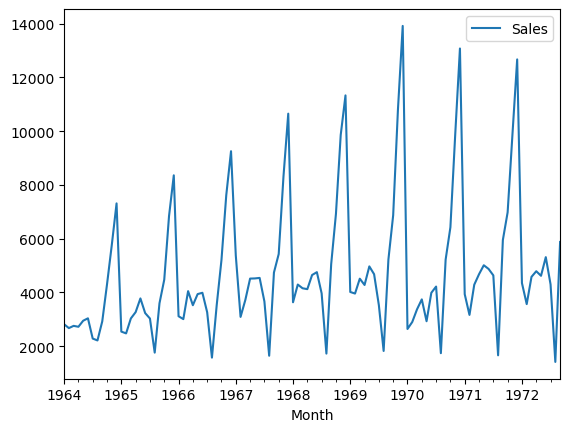

In [11]:
df.plot();

In [12]:
#Some seasonality is visible in the data so we'll check the data stationarity
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result = adfuller(df['Sales'])

In [14]:
#Hypothesis Testing
#H0= Data is stationary
#H1= Data is not stationary

def adfuller_test(Sales):
    result= adfuller(Sales)
    labels= ['ADF Test Statistics','p-value','#lags used','Number of Observations Used']
    for value, labels in zip(result,labels):
        print(labels+':'+str(value))
        
    if result[1]<=0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")    

In [15]:
adfuller_test(df['Sales'])

ADF Test Statistics:-1.83359305632762
p-value:0.36391577166024636
#lags used:11
Number of Observations Used:93
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


***Differencing***

In [16]:
df['Sales_first_difference'] = df['Sales']-df['Sales'].shift(1)

In [17]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [18]:
df['seasonal_first_difference'] = df['Sales']-df['Sales'].shift(12)

In [19]:
df.head(14)

,Sales,Sales_first_difference,seasonal_first_difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [20]:
#Perform the test again
adfuller_test(df['seasonal_first_difference'].dropna())

ADF Test Statistics:-7.626619157213166
p-value:2.0605796968136632e-11
#lags used:0
Number of Observations Used:92
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root


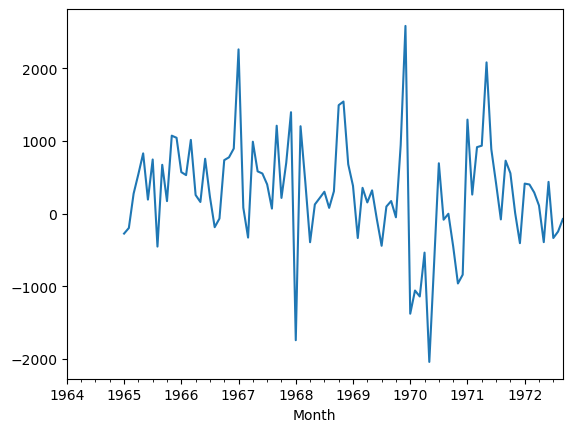

In [21]:
df['seasonal_first_difference'].plot();

***Using ARIMA Model for making Predictions***

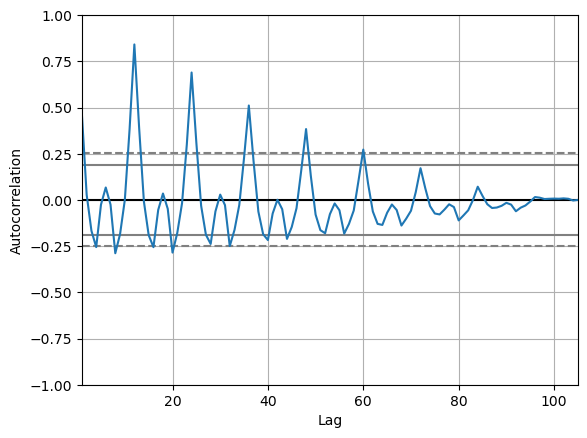

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

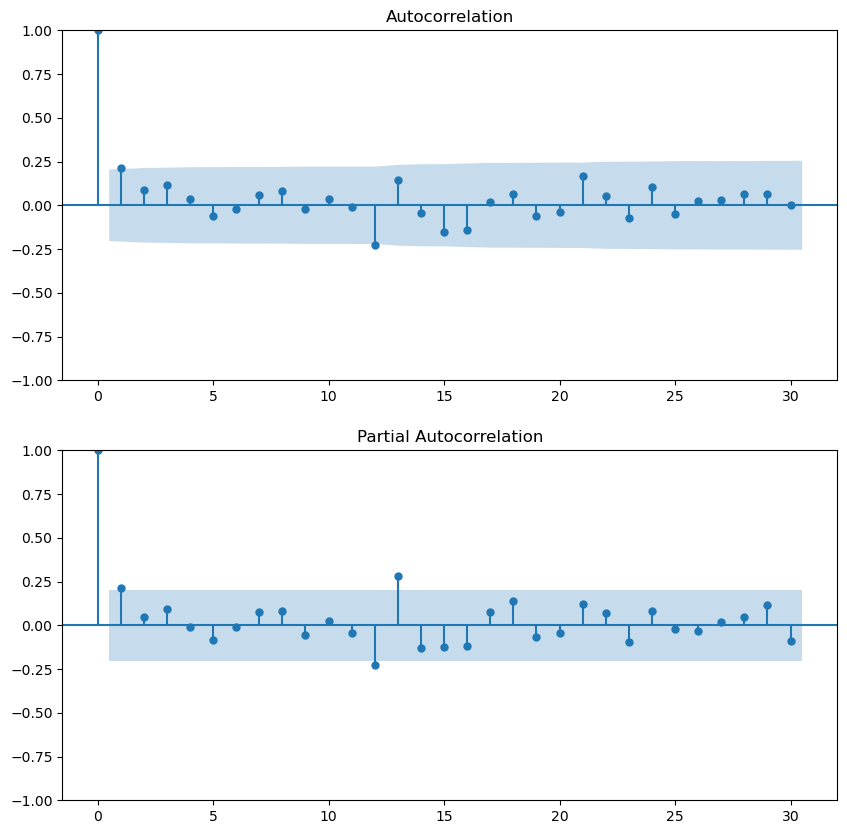

In [24]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['seasonal_first_difference'].iloc[13:],lags = 30, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['seasonal_first_difference'].iloc[13:], lags = 30, ax =  ax2)

In [25]:
#For Non-Seasonal Data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model = sm.tsa.arima.ARIMA(df['Sales'],order=(1,1,1))
model_fit = model.fit()

/Users/mahikas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mahikas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mahikas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 31 Oct 2023   AIC                           1911.627
Time:                        13:30:38   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

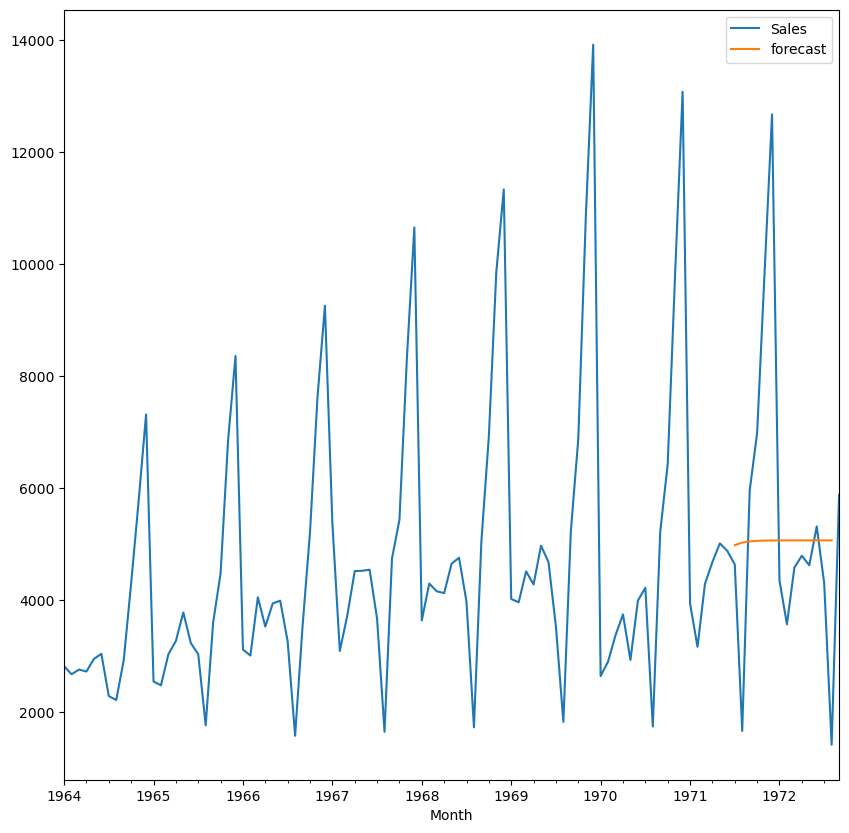

In [28]:
df['forecast'] = model_fit.predict(start = 90,end = 103, dynamic = True)
df[['Sales','forecast']].plot(figsize=(10,10));

In [29]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order = (1,1,1), seasonal_order = (1,1,1,12))
results = model.fit()

/Users/mahikas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mahikas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02

At iterate   10    f=  7.04713D+00    |proj g|=  2.99457D-04

At iterate   15    f=  7.04708D+00    |proj g|=  5.05917D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18433D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.06100D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.84003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

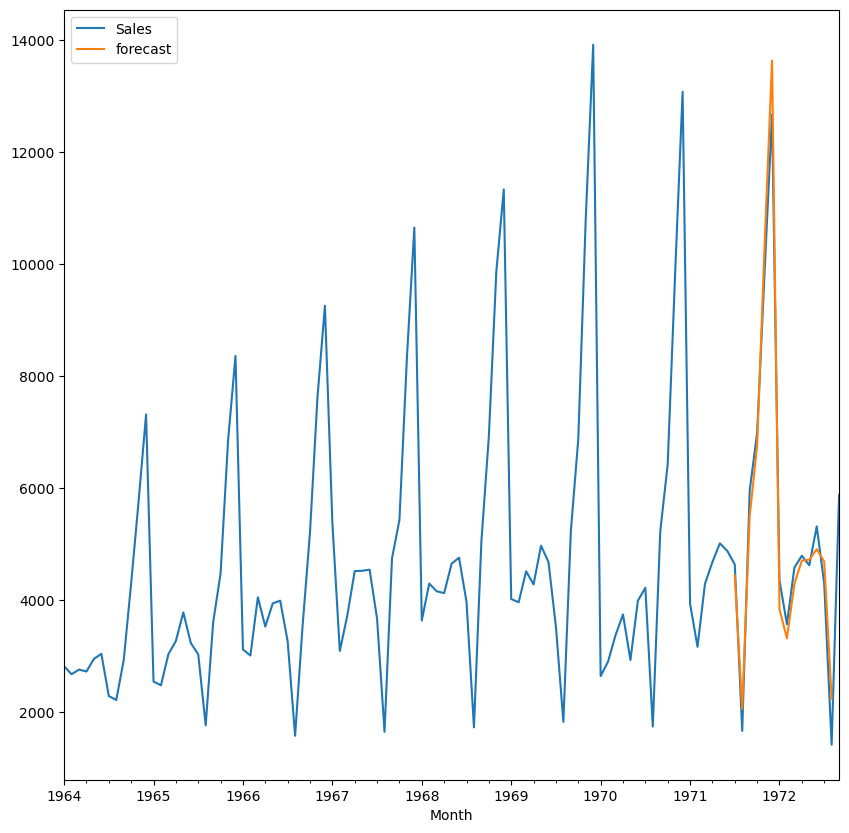

In [30]:
df['forecast'] = results.predict(start = 90, end = 103, dynamic = True)
df[['Sales','forecast']].plot(figsize=(10,10));

In [31]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+DateOffset(months = x) for x in range(0,24)]

In [32]:
future_dataset_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [33]:
future_dataset_df.tail()

,Sales,Sales_first_difference,seasonal_first_difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [34]:
future_df = pd.concat([df,future_dataset_df])

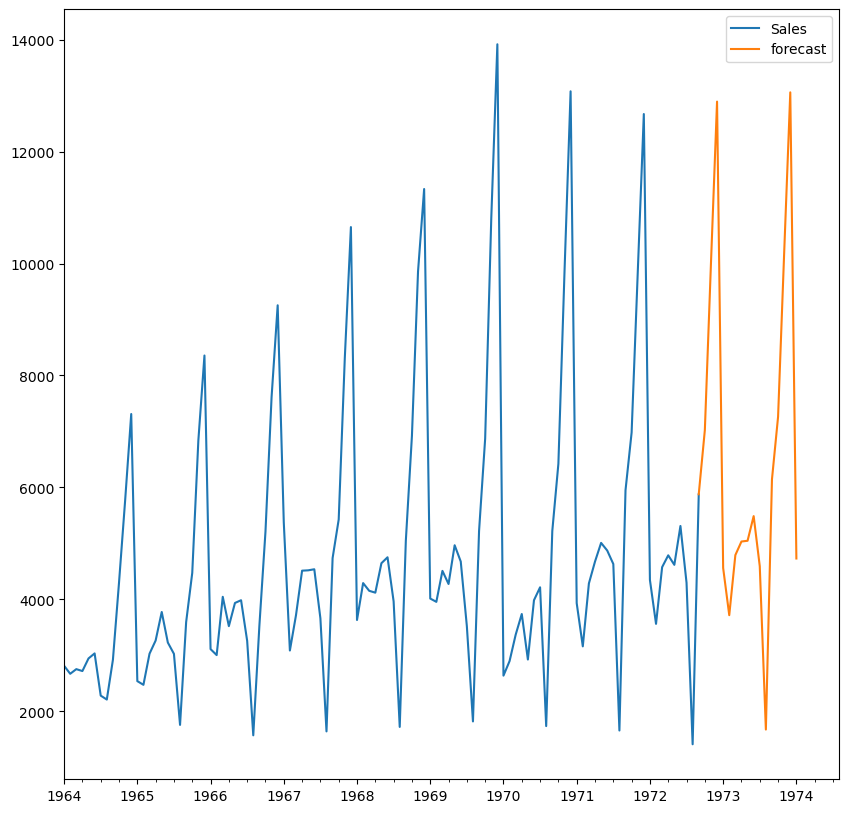

In [35]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic = True)
future_df[['Sales', 'forecast']].plot(figsize= (10,10));